# ETLYAK DAS Beamforming


In [184]:
import DAS_tools.delay_and_sum as das
import DAS_tools.room_map as room
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
import numpy as np
%load_ext autoreload
%autoreload 2

plt.style.use("seaborn-colorblind")
plt.style.use("arh")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
# sted = "lytterum"
sted = "anechoic"
type = "talk"
# type = "sine"

In [204]:
path = f"audio/{sted}/{type}_seperated/"

In [205]:
N = 5
if sted == "lytterum":
    mic_inputs, fs = das.load_inputs(path + "input","")
    speaker0 = das.speaker(-1.1, 1.6, 0)
    speaker1 = das.speaker(1, 2, 0)
else:
    mic_inputs_L, fs = das.load_inputs(path + "input", "_L")
    mic_inputs_R, fs = das.load_inputs(path + "input", "_R")
    mic_inputs_superpos = np.sum([mic_inputs_L, mic_inputs_R], axis=0)
    speaker0 = das.speaker(-1.1, 2.95, 0)
    speaker1 = das.speaker(0.95, 2.5, 0)
# mic_inputs_ref, fs = das.load_inputs(path, "_ref")
mic_array = das.microphone_array(0.2, 5)
## LYTTERUM
## LYDDØDT


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


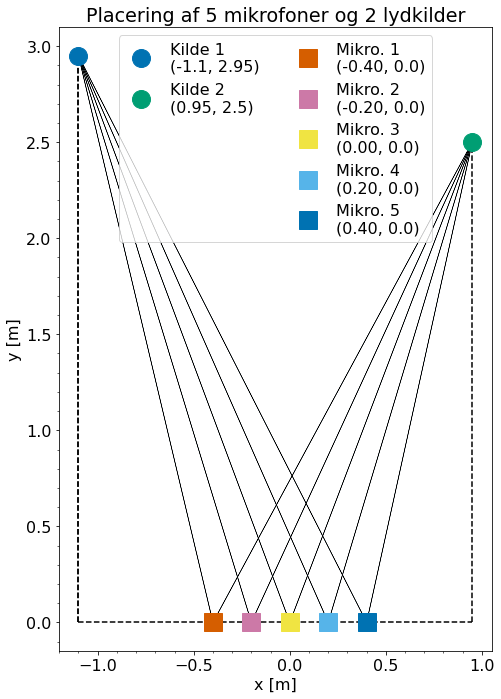

In [206]:
lytterum = room.view_placements(mic_array, speaker0, speaker1)
lytterum.savefig(f"{sted}_placeringer.eps")


The source is placed to the left of the array.
The source is placed to the right of the array.
The source is placed to the left of the array.
The source is placed to the right of the array.


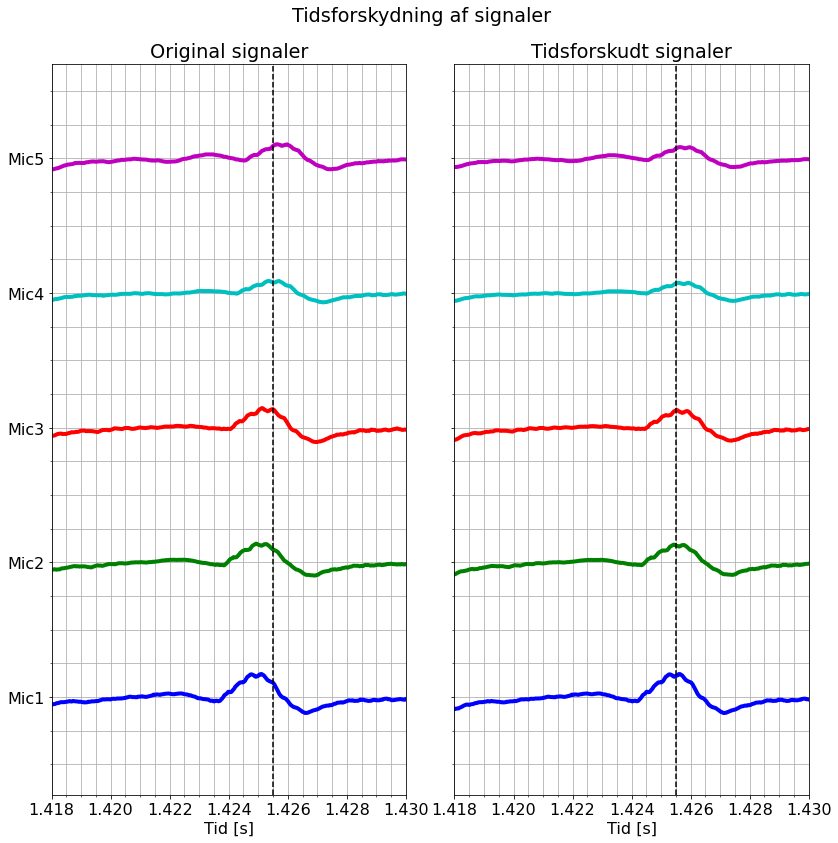

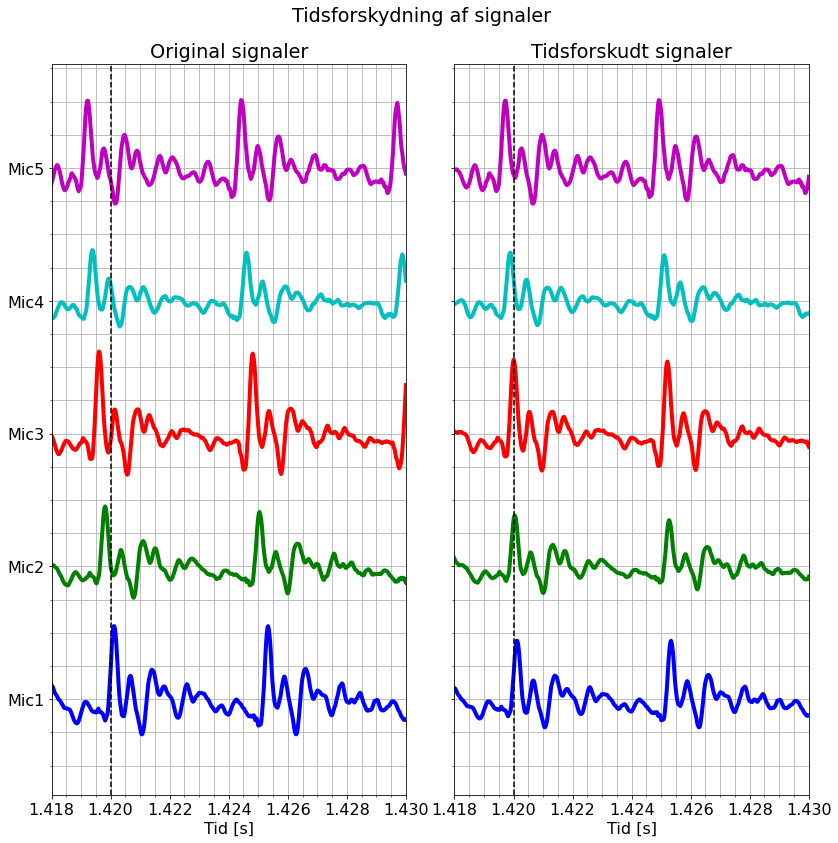

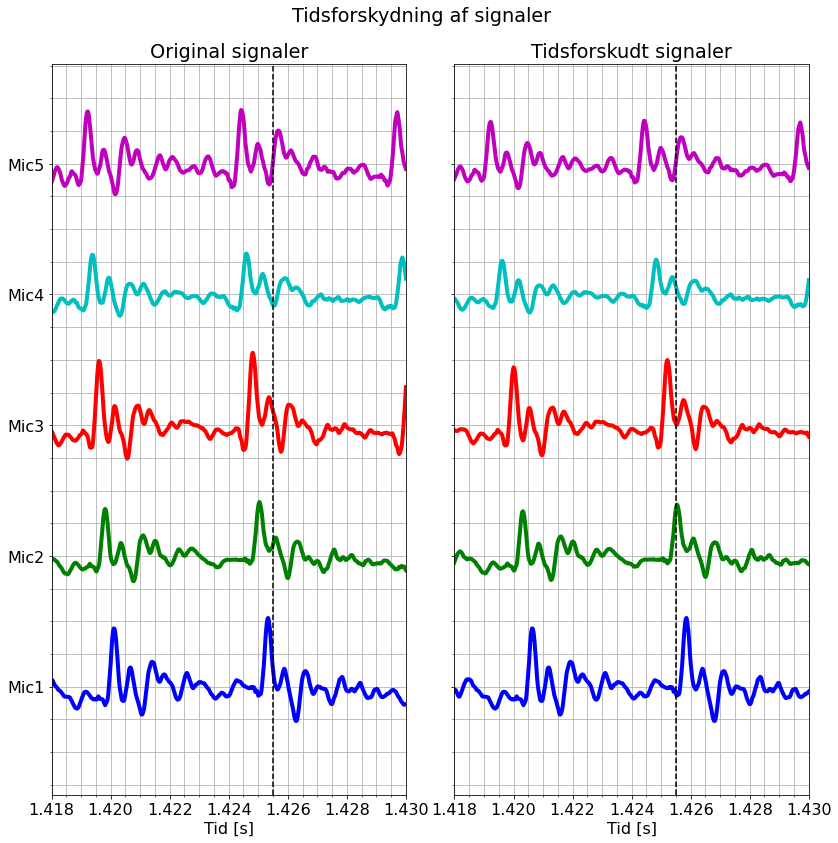

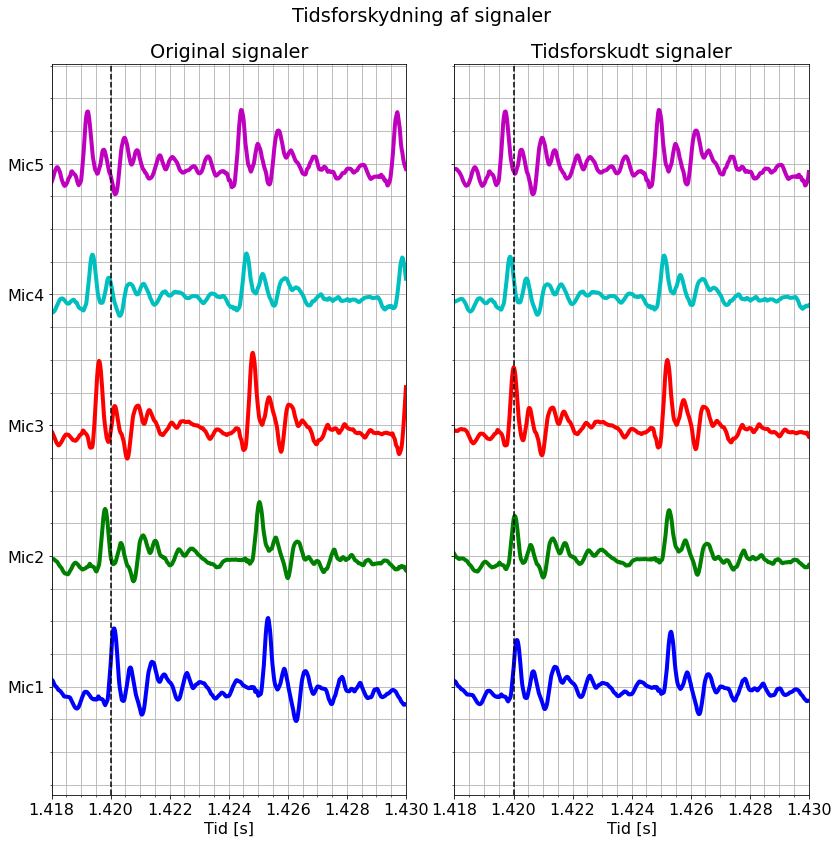

In [207]:
# shifted_spk_L = das.shift_viewer(mic_inputs_L, mic_array, speaker0)
# shifted_spk_R = das.shift_viewer(mic_inputs_R, mic_array, speaker1)
# start = 1
# period = 4/2e3 # 4 periods of 2 kHz
# stop = 1.148

if sted == "lytterum":
    shifted_steer_left = das.shift_viewer(mic_inputs, mic_array, speaker0)
    shifted_steer_right = das.shift_viewer(mic_inputs, mic_array, speaker1)
else:
    shifted_solo_steer_left = das.shift_viewer(
        mic_inputs_L, mic_array, speaker0, axv=1.4255
    )
    shifted_solo_steer_right = das.shift_viewer(
        mic_inputs_R, mic_array, speaker1, axv=1.42
    )
    shifted_steer_left = das.shift_viewer(
        mic_inputs_superpos, mic_array, speaker0, axv=1.4255
    )
    shifted_steer_right = das.shift_viewer(
        mic_inputs_superpos, mic_array, speaker1, axv=1.42
    )


In [208]:
cutoff = 400
if sted == "lytterum":
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs, cutoff)
else:
    solo_steer_left = das.sound_sum(shifted_solo_steer_left, cutoff)
    solo_steer_right = das.sound_sum(shifted_solo_steer_right, cutoff)
    steer_left = das.sound_sum(shifted_steer_left, cutoff)
    steer_right = das.sound_sum(shifted_steer_right, cutoff)
    non_steer = das.sound_sum(mic_inputs_superpos, cutoff)
    solo_non_steer_L = das.sound_sum(mic_inputs_L, cutoff)
    solo_non_steer_R = das.sound_sum(mic_inputs_R, cutoff)


In [209]:
if sted == "lytterum":
    sf.write(f"{path}steer_left.wav", steer_left, fs)
    sf.write(f"{path}steer_right.wav", steer_right, fs)
    sf.write(f"{path}non_steer.wav", non_steer, fs)

else:
    sf.write(f"{path}solo_steer_left.wav", solo_steer_left, fs)
    sf.write(f"{path}solo_steer_right.wav", solo_steer_right, fs)
    sf.write(f"{path}steer_left.wav", steer_left, fs)
    sf.write(f"{path}steer_right.wav", steer_right, fs)
    sf.write(f"{path}non_steer.wav", non_steer, fs)
    sf.write(f"{path}solo_non_steer_L.wav", solo_non_steer_L, fs)
    sf.write(f"{path}solo_non_steer_r.wav", solo_non_steer_R, fs)


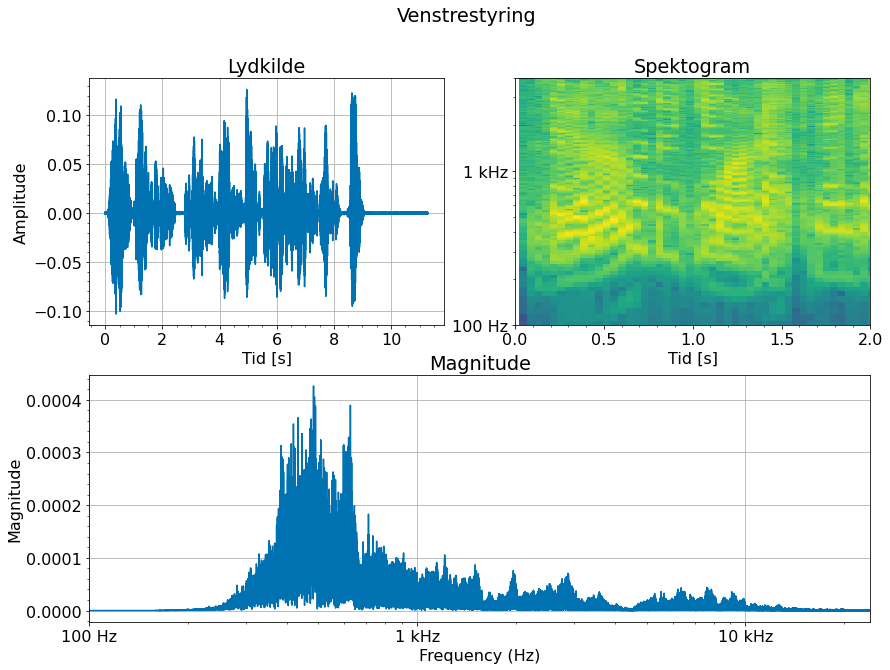

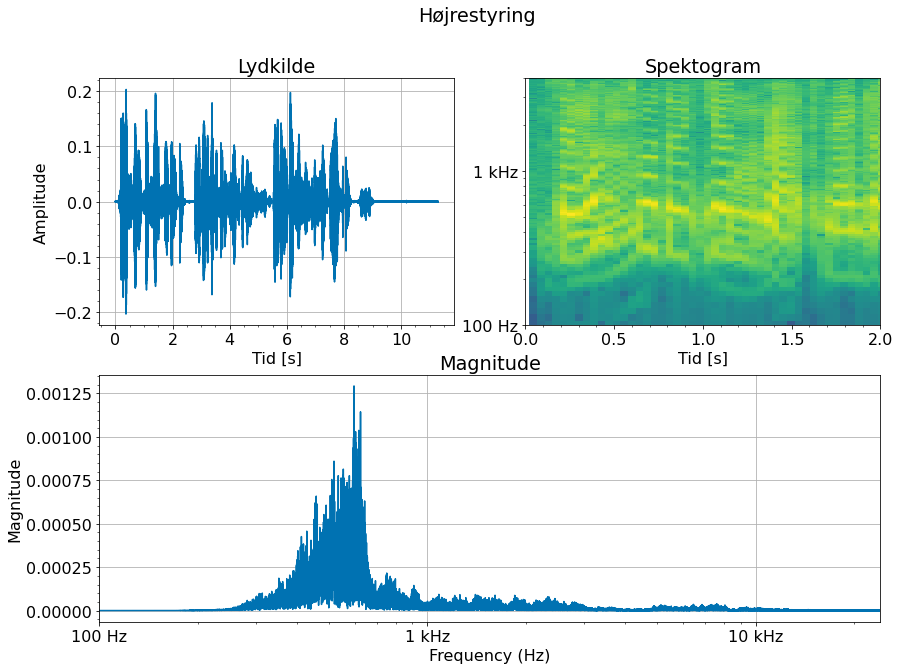

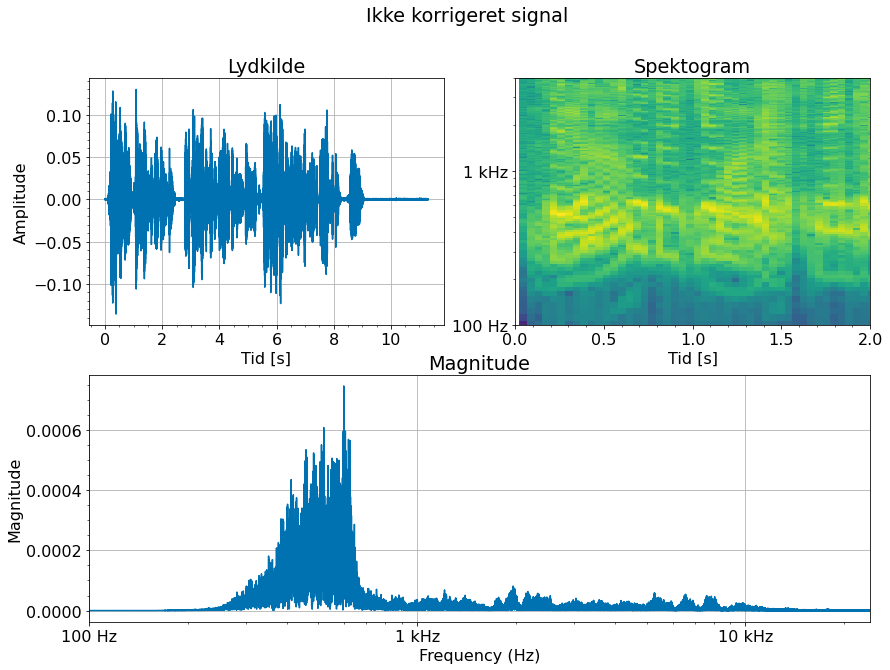

In [210]:
das.source_viewer(steer_left, fs, title="Venstrestyring",filename=f"{type}_steer_left")
das.source_viewer(steer_right, fs, title="Højrestyring",filename=f"{type}_steer_right")
das.source_viewer(non_steer, fs, title="Ikke korrigeret signal",filename=f"{type}_non_steer")


The source is placed to the left of the array.
The source is placed to the left of the array.


array([[-3.05056572e-03, -3.24475765e-03, -3.09705734e-03, ...,
        -3.26013565e-03, -3.35967541e-03, -3.36456299e-03],
       [-1.51549578e-03, -1.65875554e-03, -1.60711408e-03, ...,
        -1.56407952e-03, -1.35649443e-03, -1.46566629e-03],
       [-1.32393837e-03, -1.32114887e-03, -9.16671753e-04, ...,
        -1.63840055e-03, -1.34325027e-03, -1.46223307e-03],
       [-8.41528177e-04, -8.48317146e-04, -1.06475353e-03, ...,
        -8.76891613e-04, -9.97167826e-04, -9.82373953e-04],
       [ 6.17027283e-05,  2.80380249e-05,  1.23977661e-04, ...,
        -6.23893738e-04, -6.73580170e-04, -8.03279877e-04]])

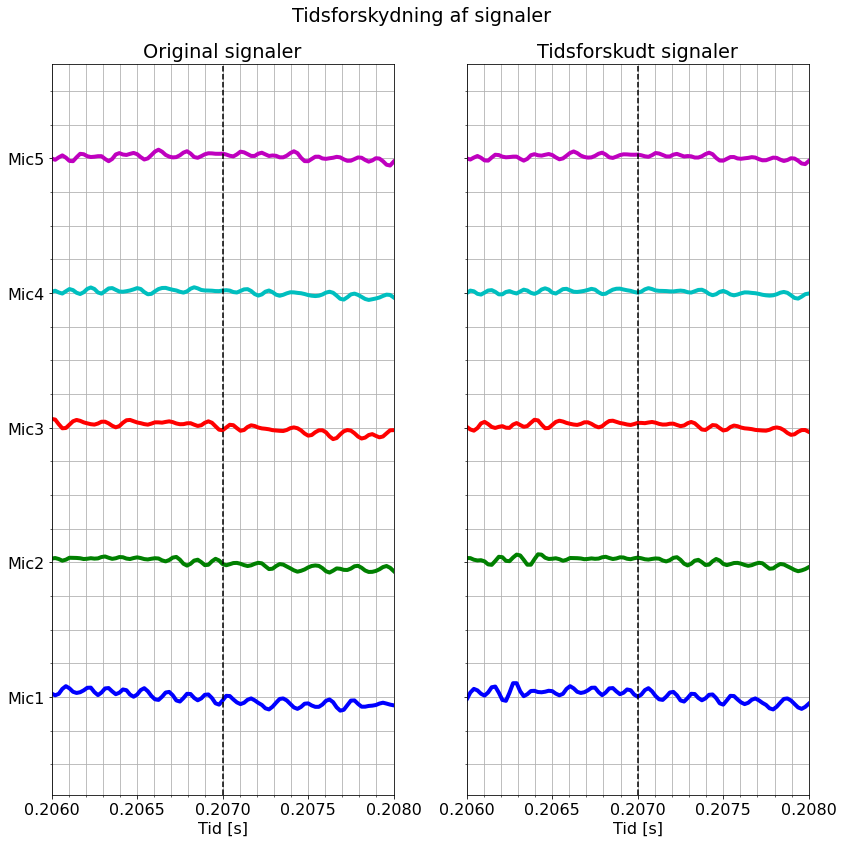

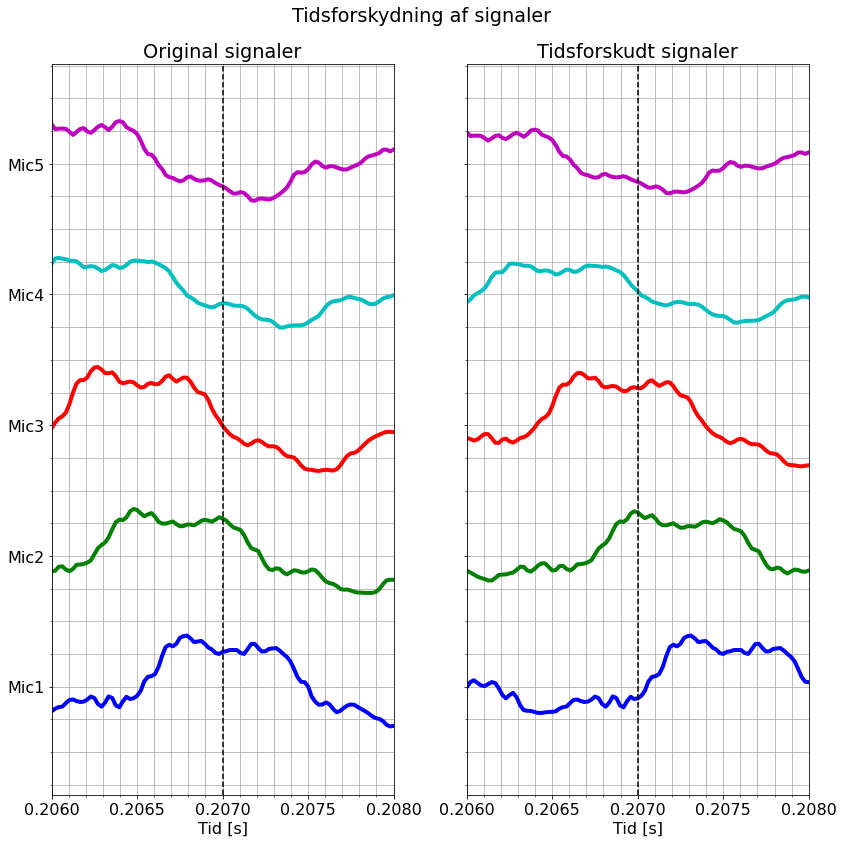

In [211]:
das.shift_viewer(
        mic_inputs_L, mic_array, speaker0,  start=0.206,stop=0.208,axv=0.207,filename=f"{type}_DAS_steer_left_solo"
    )

das.shift_viewer(
        mic_inputs_superpos, mic_array, speaker0,  start=0.206,stop=0.208,axv=0.207,filename=f"{type}_DAS_steer_left"
    )    

The source is placed to the right of the array.


array([[ 0.00035524,  0.00040731,  0.00013008, ..., -0.00256166,
        -0.00278015, -0.00270348],
       [-0.0011596 , -0.00117044, -0.00113011, ..., -0.00095562,
        -0.00104885, -0.00109201],
       [-0.0018136 , -0.0019578 , -0.0016663 , ..., -0.00183849,
        -0.00179783, -0.00195866],
       [-0.0011608 , -0.00116986, -0.00108934, ..., -0.00106465,
        -0.00108085, -0.00117881],
       [-0.00151217, -0.00143242, -0.0014993 , ..., -0.00115204,
        -0.00123572, -0.00138474]])

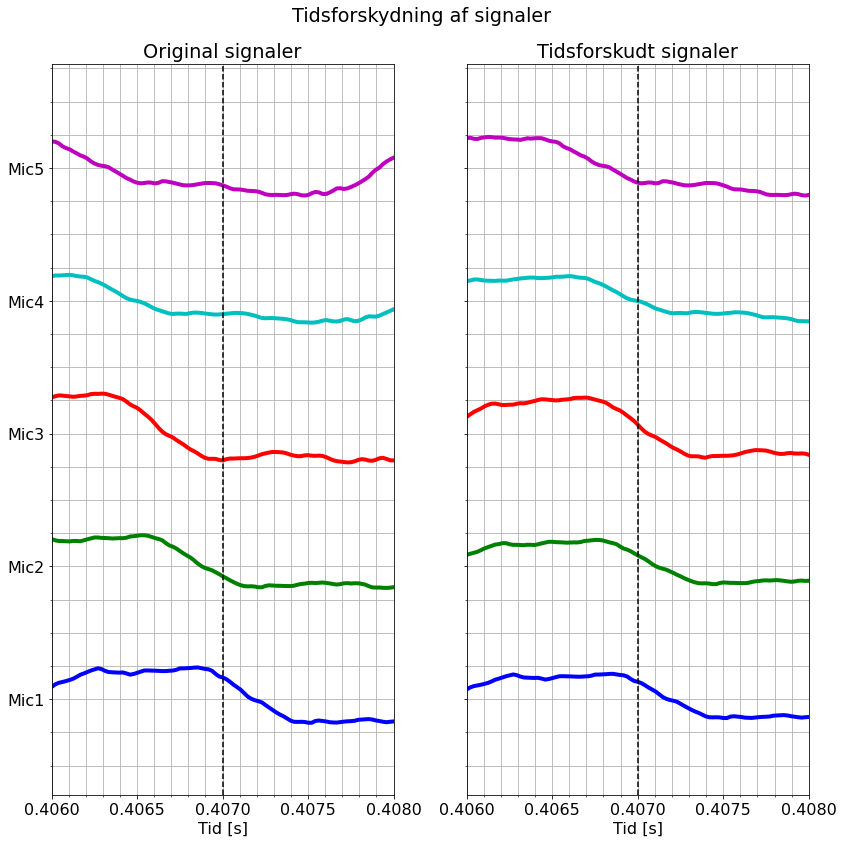

In [212]:
das.shift_viewer(
        mic_inputs_R, mic_array, speaker1, start=0.406,stop=0.408,axv=0.407,filename=f"{type}_DAS_steer_right_solo"
    )

# das.shift_viewer(
#         mic_inputs_superpos, mic_array, speaker1, start=0.206,stop=0.208,axv=0.207,filename=f"{type}_DAS_steer_right"
#     )    

In [219]:
das.delay_between_microphones(speaker1,mic_array)

The source is placed to the right of the array.
Mic:		[0. 0. 0.]
angle: [118.37138263]
extra distance:[-0.]m
extra time:[-0.]ms
sample_diff:	[-0.]samples

Mic:		[0.2 0.  0. ]
angle: [114.7006832]
extra distance:[-0.08357558]m
extra time:[-0.24344766]ms
sample_diff:	[-11.68548764]samples

Mic:		[0.4 0.  0. ]
angle: [110.8101768]
extra distance:[-0.1421092]m
extra time:[-0.41395048]ms
sample_diff:	[-19.86962303]samples

Mic:		[0.6 0.  0. ]
angle: [106.69974888]
extra distance:[-0.17241379]m
extra time:[-0.50222486]ms
sample_diff:	[-24.10679309]samples

Mic:		[0.8 0.  0. ]
angle: [102.40636063]
extra distance:[-0.171875]m
extra time:[-0.5006554]ms
sample_diff:	[-24.03145936]samples



(array([ -0.        , -11.68548764, -19.86962303, -24.10679309,
        -24.03145936]),
 array([0.8 , 0.85, 0.9 , 0.95, 1.  ]))